# Top overlapping annotations by weighted sum for ecoli cohort

In [1]:
import pandas as pd


pd.set_option("display.max_columns", None) # show all cols
pd.set_option('display.max_colwidth', None) # show full width of showing cols
pd.set_option("display.expand_frame_repr", False) # print cols side by side as it's supposed to be

## Read token information from bed files

In [2]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files', 'ECOLI')

bedDfList = []
for bedFile in os.listdir(bedDir):
    tubeid = bedFile.split('.')[0].split('_')[0]
    tokensDf = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    tokensDf['tube_id'] = tubeid
    bedDfList.append(tokensDf)

bedDf = pd.concat(bedDfList, ignore_index=True)
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id
0,1,1,3,GAA,0.024555,AH21B049
1,1,4,12,AAACCCCGG,0.019281,AH21B049
2,1,13,17,TCAAT,0.042749,AH21B049
3,1,18,22,AAGGC,0.058446,AH21B049
4,1,23,27,CGGGG,-0.002272,AH21B049
...,...,...,...,...,...,...
247349726,5,259913,259920,GCTACCCG,0.012245,ALF22C077
247349727,5,259921,259928,TTGGTGTG,0.000125,ALF22C077
247349728,5,259929,259938,CCTGTTCCGT,-0.000540,ALF22C077
247349729,5,259939,259942,GGCC,0.024973,ALF22C077


In [3]:
bedDf['token_length'] = bedDf.tokens.apply(lambda x: len(x))
bedDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
0,1,1,3,GAA,0.024555,AH21B049,3
1,1,4,12,AAACCCCGG,0.019281,AH21B049,9
2,1,13,17,TCAAT,0.042749,AH21B049,5
3,1,18,22,AAGGC,0.058446,AH21B049,5
4,1,23,27,CGGGG,-0.002272,AH21B049,5
...,...,...,...,...,...,...,...
247349726,5,259913,259920,GCTACCCG,0.012245,ALF22C077,8
247349727,5,259921,259928,TTGGTGTG,0.000125,ALF22C077,8
247349728,5,259929,259938,CCTGTTCCGT,-0.000540,ALF22C077,10
247349729,5,259939,259942,GGCC,0.024973,ALF22C077,4


In [4]:
highscoreDf = bedDf[bedDf.token_length > 5].sort_values(by=['score'], ascending=False)[:100]
highscoreDf

,contig_id,start_position,end_position,tokens,score,tube_id,token_length
197109127,1,1197500,1197506,CGTTGGC,0.984545,ALF22H044,7
235314660,1,602517,602525,TGACTTTAT,0.919031,AH20D044,9
3827800,1,602517,602525,TGACTTTAT,0.919031,ALF23B108,9
25243767,5,305012,305017,GACATC,0.911065,ALF22F150,6
236134152,4,322501,322507,GTAAACC,0.873984,ALF22K174,7
...,...,...,...,...,...,...,...
241022473,1,480014,480021,TTTTTAGA,0.584010,AH19E032,8
185016482,1,662513,662518,TTAAGG,0.583119,AH19D019,6
184218956,1,467617,467625,AAAAATAAT,0.581552,AH18K001,9
225747239,3,455005,455012,CGGCCTAC,0.580715,AH19B001,8


In [5]:
highscoreDf.shape

(100, 7)

In [6]:
highscoreDf.token_length.value_counts()

token_length
6     51
7     23
9     14
8      8
10     4
Name: count, dtype: int64

<Axes: xlabel='token_length', ylabel='Count'>

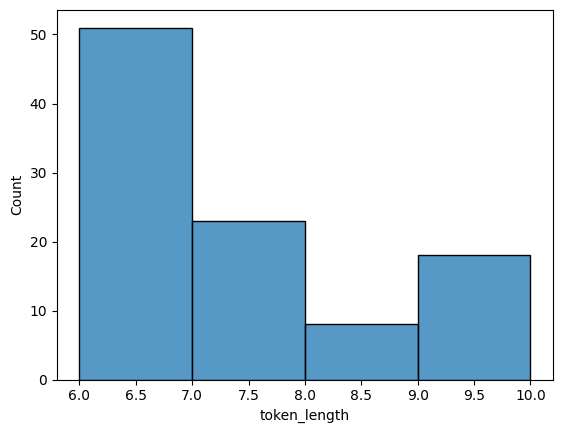

In [7]:
import seaborn as sns

sns.histplot(highscoreDf.token_length, binwidth=1)

## Read bed files containing overlapping tokens and attribution scores

In [8]:
import os
import pandas as pd
from pathlib import Path


overlappingFilesDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'overlapping_with_annotations', 'ECOLI')

overlappingDfList = []
for overlappingFile in os.listdir(overlappingFilesDir):
    df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
    df = df[df.feature_type.isin(['CDS', 'ncRNA', 'oriC', 'regulatory_region', 'oriT'])]
    df['tube_code'] = [overlappingFile.split('_')[0]]*df.shape[0]
    df = df[df.tokens.apply(lambda x: (len(x) >= 5))].reset_index()
    df['gene'] = df.gene.str.lower()
    overlappingDfList.append(df)
overlappingDf = pd.concat(overlappingDfList, ignore_index=True)
overlappingDf = overlappingDf.drop_duplicates()
overlappingDf

,index,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code
0,0,1,665,671,GAATCAT,0.037687,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yais,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
1,1,1,672,680,TTTATGAAT,0.023426,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yais,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
2,3,1,684,689,AAAACC,0.024358,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yais,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
3,4,1,690,698,TTCACCCAG,0.031550,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yais,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
4,5,1,699,708,ATCGCTATTG,0.008409,CDS,IGMLFD_00005,Uncharacterized deacetylase YaiS,yais,"ID=IGMLFD_00005;Name=Uncharacterized deacetylase YaiS;locus_tag=IGMLFD_00005;product=Uncharacterized deacetylase YaiS;Dbxref=COG:COG2120,COG:G,EC:3.-.-.-,GO:0016811,RefSeq:WP_000362014.1,SO:0001217,UniParc:UPI0000DACD3F,UniRef:UniRef100_A0A0D8VZB7,UniRef:UniRef50_P71311,UniRef:UniRef90_P71311;gene=yaiS",AH19C036
...,...,...,...,...,...,...,...,...,...,...,...,...
83835702,301834,5,357109,357119,CGGCAGACGAA,0.017858,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,"ID=KCGHAI_11840;Name=Phage-related protein%2C tail assembly protein I;locus_tag=KCGHAI_11840;product=Phage-related protein%2C tail assembly protein I;Dbxref=COG:COG4723,COG:X,RefSeq:WP_000847668.1,SO:0001217,UniParc:UPI00016DBD2D,UniRef:UniRef100_A0A0A6RKN9,UniRef:UniRef50_F4V9K2,UniRef:UniRef90_A0A369FJA2",AH19F069
83835703,301835,5,357120,357125,GGGGAT,0.030131,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,"ID=KCGHAI_11840;Name=Phage-related protein%2C tail assembly protein I;locus_tag=KCGHAI_11840;product=Phage-related protein%2C tail assembly protein I;Dbxref=COG:COG4723,COG:X,RefSeq:WP_000847668.1,SO:0001217,UniParc:UPI00016DBD2D,UniRef:UniRef100_A0A0A6RKN9,UniRef:UniRef50_F4V9K2,UniRef:UniRef90_A0A369FJA2",AH19F069
83835704,301836,5,357126,357131,GGTGGT,0.045921,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,"ID=KCGHAI_11840;Name=Phage-related protein%2C tail assembly protein I;locus_tag=KCGHAI_11840;product=Phage-related protein%2C tail assembly protein I;Dbxref=COG:COG4723,COG:X,RefSeq:WP_000847668.1,SO:0001217,UniParc:UPI00016DBD2D,UniRef:UniRef100_A0A0A6RKN9,UniRef:UniRef50_F4V9K2,UniRef:UniRef90_A0A369FJA2",AH19F069
83835705,301837,5,357132,357138,CAGGTTG,-0.022747,CDS,KCGHAI_11840,Phage-related protein%2C tail assembly protein I,NaN,"ID=KCGHAI_11840;Name=Phage-related protein%2C tail assembly protein I;locus_tag=KCGHAI_11840;product=Phage-related protein%2C tail assembly protein I;Dbxref=COG:COG4723,COG:X,RefSeq:WP_000847668.1,SO:0001217,UniParc:UPI00016DBD2D,UniRef:UniRef100_A0A0A6RKN9,UniRef:UniRef50_F4V9K2,UniRef:UniRef90_A0A369FJA2",AH19F069


## Get overlapping tokens for high-score tokens

In [9]:
tokenOverlapsDfs = []
for signatureToken in highscoreDf.tokens:
    tokenOverlapsDf = overlappingDf[overlappingDf.tokens == signatureToken]
    tokenOverlapsDfs.append(tokenOverlapsDf)
highscoreTokenOverlapsDf = pd.concat(tokenOverlapsDfs, ignore_index=True)
highscoreTokenOverlapsDf

,index,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code
0,54962,1,435475,435481,CGTTGGC,0.041834,CDS,IGMLFD_02160,putative cyclic di-GMP phosphodiesterase PdeI,pdei,"ID=IGMLFD_02160;Name=putative cyclic di-GMP phosphodiesterase PdeI;locus_tag=IGMLFD_02160;product=putative cyclic di-GMP phosphodiesterase PdeI;Dbxref=COG:COG2200,COG:T,EC:3.1.4.52,GO:0005886,GO:0071111,RefSeq:WP_000950324.1,SO:0001217,UniParc:UPI0000D50773,UniRef:UniRef100_A0A066T6S1,UniRef:UniRef50_P75800,UniRef:UniRef90_P75800;gene=pdeI",AH19C036
1,67471,1,535219,535225,CGTTGGC,0.068202,CDS,IGMLFD_02630,30S ribosomal protein S12 methylthiotransferase accessory factor YcaO,ycao,"ID=IGMLFD_02630;Name=30S ribosomal protein S12 methylthiotransferase accessory factor YcaO;locus_tag=IGMLFD_02630;product=30S ribosomal protein S12 methylthiotransferase accessory factor YcaO;Dbxref=COG:COG1944,COG:J,GO:0000287,GO:0005829,GO:0018339,GO:0047693,RefSeq:WP_000194828.1,SO:0001217,UniParc:UPI0001886507,UniRef:UniRef100_A0A2J1BX23,UniRef:UniRef50_P75838,UniRef:UniRef90_P75838;gene=ycaO",AH19C036
2,73791,1,583856,583862,CGTTGGC,0.024802,CDS,IGMLFD_02825,membrane integrity-associated transporter subunit PqiA,pqia,"ID=IGMLFD_02825;Name=membrane integrity-associated transporter subunit PqiA;locus_tag=IGMLFD_02825;product=membrane integrity-associated transporter subunit PqiA;Dbxref=COG:COG2995,COG:M,GO:0005886,KEGG:K03808,RefSeq:WP_000333182.1,SO:0001217,UniParc:UPI0000D507DE,UniRef:UniRef100_A0A2J7NJU3,UniRef:UniRef50_P0AFM0,UniRef:UniRef90_P0AFM0;gene=pqiA",AH19C036
3,77637,1,613551,613557,CGTTGGC,0.031901,CDS,IGMLFD_02980,bifunctional acid phosphatase/4-phytase,appa,"ID=IGMLFD_02980;Name=bifunctional acid phosphatase/4-phytase;locus_tag=IGMLFD_02980;product=bifunctional acid phosphatase/4-phytase;Dbxref=BlastRules:WP_001300464,EC:3.1.3.2,RefSeq:WP_001350586.1,SO:0001217,UniParc:UPI000188653A,UniRef:UniRef100_A0A2I5SLR1,UniRef:UniRef50_P07102,UniRef:UniRef90_A0A0F3TSA2;gene=appA",AH19C036
4,120307,2,169633,169639,CGTTGGC,0.034339,CDS,IGMLFD_04705,sulfate/thiosulfate ABC transporter ATP-binding protein CysA,cysa,"ID=IGMLFD_04705;Name=sulfate/thiosulfate ABC transporter ATP-binding protein CysA;locus_tag=IGMLFD_04705;product=sulfate/thiosulfate ABC transporter ATP-binding protein CysA;Dbxref=EC:7.3.2.3,GO:0005524,GO:0008272,GO:0015419,GO:0015709,GO:0035796,GO:0102025,GO:1902358,RefSeq:WP_000021034.1,SO:0001217,UniParc:UPI00000DEE52,UniRef:UniRef100_Q8FFB3,UniRef:UniRef50_P16676,UniRef:UniRef90_P16676;gene=cysA",AH19C036
...,...,...,...,...,...,...,...,...,...,...,...,...
1009088,29627,1,234645,234652,CGGGAAGC,0.031390,CDS,KCGHAI_01105,sensor histidine kinase DpiB,dpib,"ID=KCGHAI_01105;Name=sensor histidine kinase DpiB;locus_tag=KCGHAI_01105;product=sensor histidine kinase DpiB;Dbxref=COG:COG3290,COG:T,EC:2.7.13.3,GO:0000155,GO:0004673,GO:0005524,GO:0005829,GO:0005886,GO:0006355,GO:0009927,GO:0030288,GO:0046777,RefSeq:WP_001304809.1,SO:0001217,UniParc:UPI00019F3317,UniRef:UniRef100_A0A210NH25,UniRef:UniRef50_P77510,UniRef:UniRef90_P77510;gene=dpiB",AH19F069
1009089,44516,1,353551,353558,CGGGAAGC,0.035284,CDS,KCGHAI_01760,UDP-glucose 4-epimerase GalE,gale,"ID=KCGHAI_01760;Name=UDP-glucose 4-epimerase GalE;locus_tag=KCGHAI_01760;product=UDP-glucose 4-epimerase GalE;Dbxref=COG:COG1087,COG:M,EC:5.1.3.2,GO:0003978,GO:0005737,GO:0005829,GO:0005975,GO:0006012,GO:0009242,GO:0016857,GO:0033499,GO:0042802,GO:0070403,RefSeq:WP_001265442.1,SO:0001217,UniParc:UPI0001E3230C,UniRef:UniRef100_UPI0001E3230C,UniRef:UniRef50_P09147,UniRef:UniRef90_P09147;gene=galE",AH19F069
1009090,188237,3,187082,187089,CGGGAAGC,0.035216,CDS,KCGHAI_07250,ABC-type Fe3+-hydroxamate transport system%2C periplasmic component,fepb,"ID=KCGHAI_07250;Name=ABC-type Fe3+-hydroxamate transport system%2C periplasmic component;locus_tag=KCGHAI_07250;product=ABC-type Fe3+-hydroxamate transport system%2C periplasmic component;Dbxref=COG:COG0614,COG:P,RefSeq:WP_000060136.1,SO:0001217,

## Calculate weighted sum for all genes

In [10]:
import numpy as np


geneWeightedsumDf = highscoreTokenOverlapsDf.groupby(by=['gene']).agg({'score': np.sum}).reset_index().rename(columns={'score': 'weighted_sum'})
geneWeightedsumDf

/tmp/ipykernel_8123/2423154480.py:4: FutureWarning: The provided callable <function sum at 0x740d986603a0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  geneWeightedsumDf = highscoreTokenOverlapsDf.groupby(by=['gene']).agg({'score': np.sum}).reset_index().rename(columns={'score': 'weighted_sum'})


,gene,weighted_sum
0,aada1,0.164558
1,aaea,10.636254
2,aaeb,71.944668
3,aaer,11.938971
4,aaex,12.060624
...,...,...
4243,zrar,0.152162
4244,zras,0.137134
4245,zupt,10.751770
4246,zur,1.562921


## Visualise weighted sum

<Axes: xlabel='weighted_sum', ylabel='Count'>

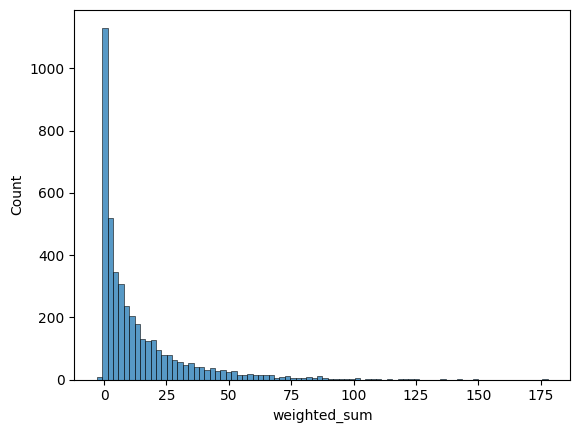

In [11]:
import seaborn as sns


sns.histplot(geneWeightedsumDf.weighted_sum)

## Top genes based on the weighted sum

In [12]:
geneWeightedsumDf.sort_values(by=['weighted_sum'], ascending=False)[:20]

,gene,weighted_sum
1848,mukb,177.799006
1145,gltb,149.197532
3646,yfal,143.059356
1880,nagb,135.455611
3502,ydij,135.362653
2801,suca,124.414355
2751,spef,122.589191
3305,ybir,122.068458
2499,rihb,121.144687
1062,galt,119.101149


## Create gene-type lookup table from amrfinderplus annotations

In [13]:
import os

import pandas as pd

from pathlib import Path


amrfinderDir = Path(os.environ['GENOMICS_DATA_BASE'], 'amrfinder')

amrfinderDfList = []
for amrfinderFile in os.listdir(amrfinderDir):
    amrfinderDf = pd.read_csv(Path(amrfinderDir, amrfinderFile), sep='\t')
    amrfinderDfList.append(amrfinderDf)

allAmrfinderDf = pd.concat(amrfinderDfList, ignore_index=True)
allAmrfinderDf

/tmp/ipykernel_8123/536070399.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  allAmrfinderDf = pd.concat(amrfinderDfList, ignore_index=True)


,Protein identifier,Contig id,Start,Stop,Strand,Gene symbol,Sequence name,Scope,Element type,Element subtype,Class,Subclass,Method,Target length,Reference sequence length,% Coverage of reference sequence,% Identity to reference sequence,Alignment length,Accession of closest sequence,Name of closest sequence,HMM id,HMM description
0,NaN,1,83926,85452,-,aur,zinc metalloproteinase aureolysin,plus,VIRULENCE,VIRULENCE,NaN,NaN,BLASTX,509,509,100.00,99.41,509,EHO93748.1,zinc metalloproteinase aureolysin,NaN,NaN
1,NaN,1,128415,129464,+,icaC,polysaccharide intercellular adhesin biosynthesis/export protein IcaC,plus,VIRULENCE,VIRULENCE,NaN,NaN,EXACTX,350,350,100.00,100.00,350,AUU58561.1,polysaccharide intercellular adhesin biosynthesis/export protein IcaC,NaN,NaN
2,NaN,1,150950,154498,-,cna,collagen adhesin Cna,plus,VIRULENCE,VIRULENCE,NaN,NaN,BLASTX,1183,1183,100.00,98.31,1183,BAB96477.1,collagen adhesin Cna,NaN,NaN
3,NaN,1,277464,278813,+,tet(38),tetracycline efflux MFS transporter Tet(38),core,AMR,AMR,TETRACYCLINE,TETRACYCLINE,EXACTX,450,450,100.00,100.00,450,WP_001100300.1,tetracycline efflux MFS transporter Tet(38),NaN,NaN
4,NaN,1,505300,506652,+,mepA,multidrug efflux MATE transporter MepA,plus,AMR,AMR,EFFLUX,EFFLUX,BLASTX,451,451,100.00,99.33,451,BAB41547.1,multidrug efflux MATE transporter MepA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57610,NaN,17,83399,84580,-,emrD,multidrug efflux MFS transporter EmrD,plus,AMR,AMR,EFFLUX,EFFLUX,BLASTX,394,394,100.00,99.24,394,ACN65732.1,multidrug efflux MFS transporter EmrD,NaN,NaN
57611,NaN,2,213498,214724,-,kdeA,multidrug efflux MFS transporter KdeA,plus,AMR,AMR,EFFLUX,EFFLUX,BLASTX,409,410,99.76,99.02,409,ABR76310.1,multidrug efflux MFS transporter KdeA,NaN,NaN
57612,NaN,3,59710,60882,+,oqxA,multidrug efflux RND transporter periplasmic adaptor subunit OqxA,core,AMR,AMR,PHENICOL/QUINOLONE,PHENICOL/QUINOLONE,BLASTX,391,391,100.00,99.23,391,WP_002914189.1,multidrug efflux RND transporter periplasmic adaptor subunit OqxA,NaN,NaN
57613,NaN,3,60909,64058,+,oqxB9,multidrug efflux RND transporter permease subunit OqxB9,core,AMR,AMR,PHENICOL/QUINOLONE,PHENICOL/QUINOLONE,ALLELEX,1050,1050,100.00,100.00,1050,WP_012967412.1,multidrug efflux RND transporter permease subunit OqxB9,NaN,NaN


In [14]:
genetypeLookupDf = allAmrfinderDf[['Gene symbol', 'Element type']].drop_duplicates()
genetypeLookupDf['Gene symbol'] = genetypeLookupDf['Gene symbol'].str.lower()
genetypeLookupDf

,Gene symbol,Element type
0,aur,VIRULENCE
1,icac,VIRULENCE
2,cna,VIRULENCE
3,tet(38),AMR
4,mepa,AMR
...,...,...
55837,blapdc-58,AMR
56358,blaact-49,AMR
56951,blandm-4,AMR
56963,aac(6')-ib-cr,AMR


## Read vfdb info

In [16]:
import os
import pandas as pd
from pathlib import Path


vfdbInfoFile = Path(os.environ['GENOMICS_DATA_BASE'], 'misc', 'VFDB_info.csv')
vfdbInfoDf = pd.read_csv(vfdbInfoFile)
vfdbInfoDf['Label'] = vfdbInfoDf['Label'].str.lower()
vfdbInfoDf

,Column,ID,Label,Description,Source,Class
0,1,c0393,vat,hemoglobin protease,Escherichia coli O6:K2:H1 CFT073 (UPEC),Autotransporters
1,2,APECO1_O1CoBM73,tsh,Tsh,Escherichia coli O1:K1:H7 (APEC),Autotransporters
2,3,Q673F0_ECOLX,rpea,putative SPATE autotransporter; similar to the SPATE proteins,Escherichia coli plasmid pRAP strain REPEC 83/39,Autotransporters
3,4,ECSF_4010,ecsf_4010,phage protein,Escherichia coli SE15,Autotransporters
4,5,EcSMS35_3921,ecsms35_3921,outer membrane autotransporter,Escherichia coli SMS-3-5 (environmental),Autotransporters
...,...,...,...,...,...,...
249,250,c5077,yddo,ABC transporter ATP-binding protein,Escherichia coli O6:K2:H1 CFT073 (UPEC),UPEC specific genes
250,251,c5078,c5078,oligopeptide ABC transporter,Escherichia coli O6:K2:H1 CFT073 (UPEC),UPEC specific genes
251,252,c5079,yddq,ABC transporter permease,Escherichia coli O6:K2:H1 CFT073 (UPEC),UPEC specific genes
252,253,c5080,yddr,ABC transporter permease,Escherichia coli O6:K2:H1 CFT073 (UPEC),UPEC specific genes


## Read vf collection

In [24]:
import os
import pandas as pd
from pathlib import Path


vfCollectionDescriptionFile = Path(os.environ['GENOMICS_DATA_BASE'], 'misc', 'ecoli_VF_collection_description.tsv')
vfCollectionDescriptionDf = pd.read_csv(vfCollectionDescriptionFile, sep='\t')
vfCollectionDescriptionDf['gene'] = vfCollectionDescriptionDf['gene'].str.lower()
vfCollectionDescriptionDf

,gene,locus tag,accession number (protein_id),description,reference,source,class
0,aap,EC042_pAA055,NaN,dispersin,Escherichia coli O44:H18 042 plasmid pAA (EAEC),VFDB R2,Adhesion_invasion
1,aata,EC042_pAA008,NaN,dispersin secretion locus ABC transporter,Escherichia coli O44:H18 042 plasmid pAA (EAEC),VFDB R2,Adhesion_invasion
2,aatb,EC042_pAA009,NaN,dispersin secretion locus ABC transporter,Escherichia coli O44:H18 042 plasmid pAA (EAEC),VFDB R2,Adhesion_invasion
3,aatc,EC042_pAA010,NaN,dispersin secretion locus ABC transporter,Escherichia coli O44:H18 042 plasmid pAA (EAEC),VFDB R2,Adhesion_invasion
4,aatd,EC042_pAA011,NaN,dispersin secretion locus ABC transporter,Escherichia coli O44:H18 042 plasmid pAA (EAEC),VFDB R2,Adhesion_invasion
...,...,...,...,...,...,...,...
1064,lngj,NaN,ABU50049,"longus pili, coli surface antigen CS20",Escherichia coli O8:H9 E9034A (ETEC),VFDB R3,Type_4_pilus
1065,lngp,NaN,ABU50050,"longus pili, coli surface antigen CS20",Escherichia coli O8:H9 E9034A (ETEC),VFDB R3,Type_4_pilus
1066,etsa,APECO1_O1CoBM197,YP_001481352,ABC transporter,Escherichia coli O1:K1:H7 APEC O1 plasmid pAPEC-O1-ColBM (APEC),manually,Other_virulence_gene
1067,etsb,APECO1_O1CoBM198,YP_001481353,ABC transporter,Escherichia coli O1:K1:H7 APEC O1 plasmid pAPEC-O1-ColBM (APEC),manually,Other_virulence_gene


## Read ABRicate

In [38]:
import os
import pandas as pd
from pathlib import Path


abricateFile = Path(os.environ['GENOMICS_DATA_BASE'], 'misc', 'ABRicate.csv')
abricateDf = pd.read_csv(abricateFile)
abricateDf['gene'] = abricateDf['gene'].str.lower()
abricateDf

,gene,type
0,aaa23990,heat-stable enterotoxin
1,aaa24093,heat labile enterotoxin type IIa A
2,aaa24094,heat labile enterotoxin type IIa B
3,apeco1_1753,hypothetical protein
4,apeco1_1761,hypothetical protein
...,...,...
2696,ygeh,transcriptional regulator
2697,yggr,
2698,yghg,
2699,yijp,


## Add gene descriptions to the top genes

In [48]:
geneWeightedsumDf.sort_values(by=['weighted_sum'], ascending=False)[:20].merge(
    highscoreTokenOverlapsDf[['gene', 'name']].drop_duplicates(),
    on=['gene'],
    how='inner'
).merge(
    genetypeLookupDf,
    left_on=['gene'],
    right_on=['Gene symbol'],
    how='left'
).rename(
    columns={'Element type': 'AMR Finder Type'}
).merge(
    vfdbInfoDf,
    left_on=['gene'],
    right_on=['Label'],
    how='left'
).rename(
    columns={'Class': 'VFDB Type'}
).merge(
    vfCollectionDescriptionDf,
    on=['gene'],
    how='left'
).rename(
    columns={'class': 'VF Collection Type'}
)[['gene', 'name', 'weighted_sum', 'AMR Finder Type', 'VFDB Type', 'VF Collection Type']].drop_duplicates()

,gene,name,weighted_sum,AMR Finder Type,VFDB Type,VF Collection Type
0,mukb,chromosome partition protein MukB,177.799006,NaN,NaN,NaN
1,gltb,glutamate synthase large subunit,149.197532,NaN,NaN,NaN
2,yfal,AIDA-I family autotransporter adhesin YfaL/EhaC,143.059356,NaN,Autotransporters,NaN
3,nagb,glucosamine-6-phosphate deaminase,135.455611,NaN,NaN,NaN
4,nagb,galactosamine-6-phosphate isomerase,135.455611,NaN,NaN,NaN
5,ydij,D-2-hydroxyglutarate dehydrogenase,135.362653,NaN,NaN,NaN
6,suca,2-oxoglutarate dehydrogenase E1 component,124.414355,NaN,UPEC specific genes,NaN
7,spef,ornithine decarboxylase SpeF,122.589191,NaN,NaN,NaN
8,ybir,Inner membrane protein YbiR,122.068458,NaN,NaN,NaN
9,rihb,ribosylpyrimidine nucleosidase,121.144687,NaN,NaN,NaN


## Create annotations data matrix

In [50]:

signatureAnnotationsDf = highscoreTokenOverlapsDf[highscoreTokenOverlapsDf['gene'].isin(geneWeightedsumDf.sort_values(by=['weighted_sum'], ascending=False)[:20]['gene'])]
signatureAnnotationsDf


,index,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code
1423,145824,4,122501,122507,CGTTGGC,0.025461,CDS,OKNDNF_05540,galactose-1-phosphate uridylyltransferase,galt,"ID=OKNDNF_05540;Name=galactose-1-phosphate uridylyltransferase;locus_tag=OKNDNF_05540;product=galactose-1-phosphate uridylyltransferase;Dbxref=EC:2.7.7.12,KEGG:K00965,RefSeq:WP_001265443.1,SO:0001217,UniParc:UPI00000D087C,UniRef:UniRef100_A0A377CKT4,UniRef:UniRef50_A0A377CKT4,UniRef:UniRef90_A0A377CKT4;gene=galT",AH20F011
5470,299387,5,31281,31286,GACATC,0.050581,CDS,IGMLFD_11560,lipoprotein metalloprotease SslE,ssle,"ID=IGMLFD_11560;Name=lipoprotein metalloprotease SslE;locus_tag=IGMLFD_11560;product=lipoprotein metalloprotease SslE;Dbxref=KEGG:K10939,NCBIProtein:ADE89421.1,RefSeq:WP_001034562.1,SO:0001217,UniParc:UPI0000D50C47,UniRef:UniRef100_A0A1V2SXV7,UniRef:UniRef50_P0CK95,UniRef:UniRef90_A0A0G9FN78;gene=sslE",AH19C036
5499,165944,3,256870,256875,GACATC,0.047819,CDS,MMLIBF_06340,AIDA-I family autotransporter adhesin YfaL/EhaC,yfal,"ID=MMLIBF_06340;Name=AIDA-I family autotransporter adhesin YfaL/EhaC;locus_tag=MMLIBF_06340;product=AIDA-I family autotransporter adhesin YfaL/EhaC;Dbxref=SO:0001217,UniParc:UPI0002A2E21D,UniRef:UniRef100_A0A446FHF6,UniRef:UniRef50_P45508,UniRef:UniRef90_A0A454A614;gene=yfaL",AH19C073
5502,169782,3,286348,286353,GACATC,0.103871,CDS,MMLIBF_06460,lipid IV(A) 4-amino-4-deoxy-L-arabinosyltransferase,arnt,"ID=MMLIBF_06460;Name=lipid IV(A) 4-amino-4-deoxy-L-arabinosyltransferase;locus_tag=MMLIBF_06460;product=lipid IV(A) 4-amino-4-deoxy-L-arabinosyltransferase;Dbxref=COG:COG1807,COG:M,EC:2.4.2.43,GO:0005886,GO:0009103,GO:0009245,GO:0042221,GO:1901505,RefSeq:WP_000844008.1,SO:0001217,UniParc:UPI0001C22B95,UniRef:UniRef100_A0A066T4H8,UniRef:UniRef50_O52327,UniRef:UniRef90_Q0T2M6;gene=arnT",AH19C073
5552,227097,5,36690,36695,GACATC,0.057085,CDS,MIIKGN_08790,lipoprotein metalloprotease SslE,ssle,"ID=MIIKGN_08790;Name=lipoprotein metalloprotease SslE;locus_tag=MIIKGN_08790;product=lipoprotein metalloprotease SslE;Dbxref=KEGG:K10939,NCBIProtein:ADE89421.1,RefSeq:WP_001034562.1,SO:0001217,UniParc:UPI0000D50C47,UniRef:UniRef100_A0A1V2SXV7,UniRef:UniRef50_P0CK95,UniRef:UniRef90_A0A0G9FN78;gene=sslE",AH19G061
...,...,...,...,...,...,...,...,...,...,...,...,...
1009015,11657,1,87890,87897,CGGGAAGC,0.046775,CDS,BCIOJL_00385,bifunctional UDP-4-amino-4-deoxy-L-arabinose formyltransferase/UDP-glucuronic acid oxidase ArnA,arna,"ID=BCIOJL_00385;Name=bifunctional UDP-4-amino-4-deoxy-L-arabinose formyltransferase/UDP-glucuronic acid oxidase ArnA;locus_tag=BCIOJL_00385;product=bifunctional UDP-4-amino-4-deoxy-L-arabinose formyltransferase/UDP-glucuronic acid oxidase ArnA;Dbxref=COG:COG0451,COG:M,GO:0009103,GO:0009245,GO:0016831,GO:0046677,GO:0099618,GO:0099619,RefSeq:WP_022645909.1,SO:0001217,UniParc:UPI0003B400F0,UniRef:UniRef100_A0A0A1A7J7,UniRef:UniRef50_Q83QT8,UniRef:UniRef90_Q83QT8;gene=arnA",AH20B054
1009025,166102,3,161220,161227,CGGGAAGC,0.032640,CDS,KBMNEN_06230,galactose-1-phosphate uridylyltransferase,galt,"ID=KBMNEN_06230;Name=galactose-1-phosphate uridylyltransferase;locus_tag=KBMNEN_06230;product=galactose-1-phosphate uridylyltransferase;Dbxref=EC:2.7.7.12,KEGG:K00965,RefSeq:WP_001265443.1,SO:0001217,UniParc:UPI00000D087C,UniRef:UniRef100_A0A377CKT4,UniRef:UniRef50_A0A377CKT4,UniRef:UniRef90_A0A377CKT4;gene=galT",AH18J044
1009061,29871,1,227631,227638,CGGGAAGC,0.034828,CDS,KNCKDN_01010,bifunctional UDP-4-amino-4-deoxy-L-arabinose formyltransferase/UDP-glucuronic acid oxidase ArnA,arna,"ID=KNCKDN_01010;Name=bifunctional UDP-4-amino-4-deoxy-L-arabinose formyltransferase/UDP-glucuronic acid oxidase ArnA;locus_tag=KNCKDN_01010;product=bifunctional UDP-4-amino-4-deoxy-L-arabinose formyltransferase/UDP-glucuronic acid oxidase ArnA;Dbxref=COG:COG0451,COG:M,GO:0009103,GO:0009245,GO:0016831,GO:0046677,GO:0099618,GO:0099619,RefSeq:WP_022645909.1,SO:0001217,UniParc:UPI0003B400F0,UniRef:UniRef100_A0A0A1A7J7

In [52]:
signatureDataDf = signatureAnnotationsDf[['tube_code', 'gene']].drop_duplicates()
# Get one hot encoding of columns B
one_hot = pd.get_dummies(signatureDataDf['gene'])
# Drop column B as it is now encoded
signatureDataDf = signatureDataDf.drop('gene',axis = 1)
# Join the encoded df
signatureDataDf = signatureDataDf.join(one_hot)
signatureDataDf = signatureDataDf.loc[:, (signatureDataDf != 0).any(axis=0)]
signatureDataDf = signatureDataDf*1
signatureDataDf

,tube_code,arna,arnt,ebga,fepd,galt,gltb,mfd,mukb,nagb,nuol,ppsa,rcsc,rihb,spef,ssle,suca,ybhj,ybir,ydij,yfal
1423,AH20F011,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5470,AH19C036,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5499,AH19C073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5502,AH19C073,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5552,AH19G061,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993270,AH18J044,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
993286,AH19K070,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
993310,AH19B038,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
993328,AH19H076,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Read mapping information

In [53]:
import os

import pandas as pd


demoTrainDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_train.csv', sep='\t')
demoTestDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_test.csv', sep='\t')
demoValidateDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_validate.csv', sep='\t')
demoDf = pd.concat([demoTrainDf, demoTestDf, demoValidateDf], ignore_index=True)
demoDf

,person_id,visit_occurrence_id,TYPE,COUNTRY_OF_BIRTH,SEX,Age_Bin,JOURNEY_ID
0,678487,3312694,Emergency,Australia,Male,"(60, 70]",3312694
1,2094045,9199249,Emergency,Australia,Male,"(20, 30]",9199249
2,2107813,9410987,Emergency,Australia,Male,"(50, 60]",9410987
3,2083212,602890,Inpatient,Australia,Female,"(40, 50]",9039437
4,2083212,9039437,Emergency,Australia,Female,"(40, 50]",9039437
...,...,...,...,...,...,...,...
7194,2603535,16588204,Inpatient,Australia,Male,"(60, 70]",16588204
7195,2603535,16709341,Inpatient,Australia,Male,"(60, 70]",16709341
7196,2603535,16651755,Inpatient,Australia,Male,"(60, 70]",16651755
7197,2098616,16872774,Emergency,Australia,Female,"(80, 90]",16872774


In [54]:
import os

mappingDf = pd.read_csv(os.environ['GENOMICS_DATA_BASE'] + '/patient_tube_id_mapping_full.tsv', sep='\t')
mappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous


In [55]:
mappedJourneyTubeIdsDf = mappingDf[['tube_code', 'PATIENT_ID', 'EPISODE_ID']].drop_duplicates().merge(
    demoDf[['person_id', 'visit_occurrence_id', 'JOURNEY_ID']],
    how='inner',
    left_on=['PATIENT_ID', 'EPISODE_ID'],
    right_on=['person_id', 'visit_occurrence_id']
).drop(
    columns=['PATIENT_ID', 'EPISODE_ID', 'visit_occurrence_id']
)[['person_id', 'JOURNEY_ID', 'tube_code']].drop_duplicates()
mappedJourneyTubeIdsDf

,person_id,JOURNEY_ID,tube_code
0,50056,13224842,AH20B011
1,62567,12645629,AH19G065
2,138108,14737781,AH21E052
3,211314,13955099,AH20J009
4,211314,13955099,KPN2214
...,...,...,...
512,2084373,16158768,ALF22C004
513,1058066,16759482,ALF22H089
514,2552781,16966609,ALF22J054
515,2638484,16969999,ALF22K143


## Read mortality labels

In [56]:
import os

import pandas as pd

from pathlib import Path


mortalityTrainDf = pd.read_csv(Path(os.environ['EHR_DATA_BASE'], 'blood_pos_cohort_20240614', 'data', 'wb_365_wa_1', 'splits_v1', 'labels', 'mortality', 'mortality_30_day_normal_train.csv'), sep='\t')
mortalityTestDf = pd.read_csv(Path(os.environ['EHR_DATA_BASE'], 'blood_pos_cohort_20240614', 'data', 'wb_365_wa_1', 'splits_v1', 'labels', 'mortality', 'mortality_30_day_normal_test.csv'), sep='\t')
mortalityValidateDf = pd.read_csv(Path(os.environ['EHR_DATA_BASE'], 'blood_pos_cohort_20240614', 'data', 'wb_365_wa_1', 'splits_v1', 'labels', 'mortality', 'mortality_30_day_normal_validate.csv'), sep='\t')
mortalityDf = pd.concat([mortalityTrainDf, mortalityTestDf, mortalityValidateDf], ignore_index=True).drop_duplicates()
mortalityDf

,person_id,JOURNEY_ID,visit_occurrence_id,death_30_day
0,678487,3312694,3312694,0
1,2094045,9199249,9199249,0
2,2107813,9410987,9410987,1
5,2083212,9039437,602890,0
6,2083212,9039437,9039437,0
...,...,...,...,...
30815,2603535,16588204,16588204,0
30820,2603535,16709341,16709341,0
30832,2603535,16651755,16651755,0
30838,2098616,16872774,16872774,0


## Create datamatrix

In [58]:
dataDf = mortalityDf.merge(
    mappedJourneyTubeIdsDf,
    on=['person_id', 'JOURNEY_ID'],
    how='inner'
).drop(
    columns=['visit_occurrence_id']
).drop_duplicates().merge(
    signatureDataDf,
    on=['tube_code'],
    how='inner'
).drop(
    columns=['tube_code']
)
dataDf = dataDf.loc[:, (dataDf != 0).any(axis=0)]
dataDf

,person_id,JOURNEY_ID,death_30_day,arna,arnt,ebga,fepd,galt,gltb,mfd,mukb,nagb,nuol,ppsa,rcsc,rihb,spef,ssle,suca,ybhj,ybir,ydij,yfal
0,2100650,603830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2100650,603830,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2100650,603830,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2100650,603830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2100650,603830,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2133609,13959236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
546,2133609,13959236,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
547,2133609,13959236,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
548,2133609,13959236,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## Calculate correlation

In [67]:
dataDf.drop(columns=['person_id', 'JOURNEY_ID']).corr()

,death_30_day,arna,arnt,ebga,fepd,galt,gltb,mfd,mukb,nagb,nuol,ppsa,rcsc,rihb,spef,ssle,suca,ybhj,ybir,ydij,yfal
death_30_day,1.000000,0.003433,0.003433,-0.029728,-0.007524,0.021247,-0.037176,0.021581,0.009719,-0.021738,0.002563,0.004229,-0.002134,0.008643,0.014833,-0.021738,0.015386,0.002563,0.015386,0.004229,-0.002134
arna,0.003433,1.000000,-0.053640,-0.056603,-0.055629,-0.053640,-0.054642,-0.047276,-0.055629,-0.051590,-0.050540,-0.056603,-0.054642,-0.049472,-0.044991,-0.051590,-0.054642,-0.050540,-0.054642,-0.056603,-0.054642
arnt,0.003433,-0.053640,1.000000,-0.056603,-0.055629,-0.053640,-0.054642,-0.047276,-0.055629,-0.051590,-0.050540,-0.056603,-0.054642,-0.049472,-0.044991,-0.051590,-0.054642,-0.050540,-0.054642,-0.056603,-0.054642
ebga,-0.029728,-0.056603,-0.056603,1.000000,-0.058702,-0.056603,-0.057660,-0.049887,-0.058702,-0.054440,-0.053332,-0.059730,-0.057660,-0.052205,-0.047476,-0.054440,-0.057660,-0.053332,-0.057660,-0.059730,-0.057660
fepd,-0.007524,-0.055629,-0.055629,-0.058702,1.000000,-0.055629,-0.056668,-0.049029,-0.057692,-0.053503,-0.052414,-0.058702,-0.056668,-0.051306,-0.046659,-0.053503,-0.056668,-0.052414,-0.056668,-0.058702,-0.056668
galt,0.021247,-0.053640,-0.053640,-0.056603,-0.055629,1.000000,-0.054642,-0.047276,-0.055629,-0.051590,-0.050540,-0.056603,-0.054642,-0.049472,-0.044991,-0.051590,-0.054642,-0.050540,-0.054642,-0.056603,-0.054642
gltb,-0.037176,-0.054642,-0.054642,-0.057660,-0.056668,-0.054642,1.000000,-0.048159,-0.056668,-0.052553,-0.051484,-0.057660,-0.055662,-0.050396,-0.045831,-0.052553,-0.055662,-0.051484,-0.055662,-0.057660,-0.055662
mfd,0.021581,-0.047276,-0.047276,-0.049887,-0.049029,-0.047276,-0.048159,1.000000,-0.049029,-0.045469,-0.044544,-0.049887,-0.048159,-0.043602,-0.039653,-0.045469,-0.048159,-0.044544,-0.048159,-0.049887,-0.048159
mukb,0.009719,-0.055629,-0.055629,-0.058702,-0.057692,-0.055629,-0.056668,-0.049029,1.000000,-0.053503,-0.052414,-0.058702,-0.056668,-0.051306,-0.046659,-0.053503,-0.056668,-0.052414,-0.056668,-0.058702,-0.056668
nagb,-0.021738,-0.051590,-0.051590,-0.054440,-0.053503,-0.051590,-0.052553,-0.045469,-0.053503,1.000000,-0.048608,-0.054440,-0.052553,-0.047581,-0.043271,-0.049618,-0.052553,-0.048608,-0.052553,-0.054440,-0.052553


## Plot correlations as a heatmap

<Axes: >

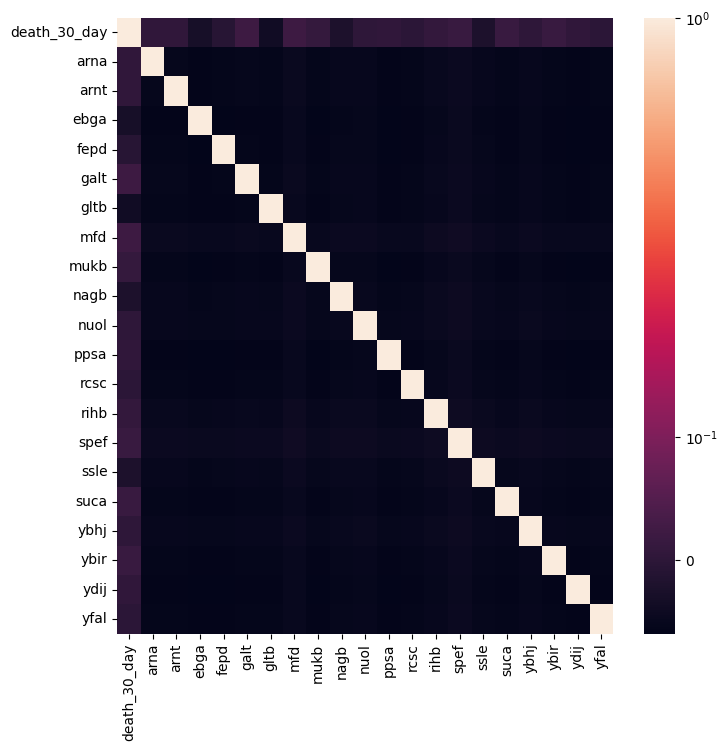

In [74]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from matplotlib.colors import SymLogNorm


f, ax = plt.subplots(1, 1, figsize=(8, 8))

# plot the heatmap
sns.heatmap(dataDf.drop(columns=['person_id', 'JOURNEY_ID']).corr(), norm=SymLogNorm(linthresh=0.3))

## Model using machine learning

In [77]:
X = dataDf[['arna', 'arnt', 'ebga', 'fepd', 'galt', 'gltb', 'mfd', 'mukb', 'nagb', 'nuol', 'ppsa', 'rcsc', 'rihb', 'spef', 'ssle', 'suca', 'ybhj', 'ybir', 'ydij', 'yfal']]
y = dataDf.death_30_day

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_pred)

0.5636363636363636

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
lrc = LogisticRegression(random_state=0)
lrc.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_pred)

0.6727272727272727

In [95]:
coefficients = lrc.coef_[0]
featureImportanceDf = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
    })
featureImportanceDf

,Feature,Coefficient
0,arna,-0.037892
1,arnt,0.075177
2,ebga,-0.225376
3,fepd,-0.115107
4,galt,0.022928
5,gltb,-0.181888
6,mfd,0.184421
7,mukb,-0.181888
8,nagb,0.015475
9,nuol,0.015475


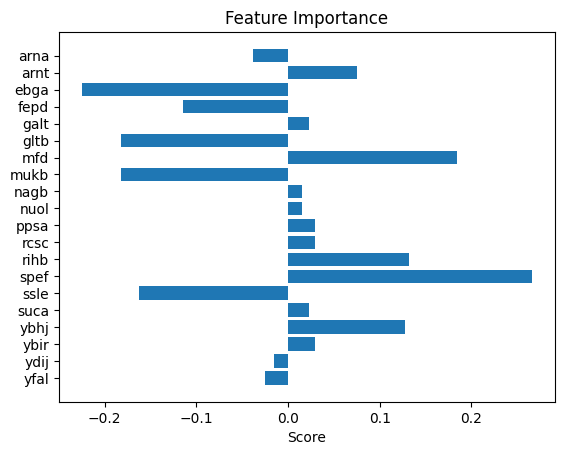

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()

ax.barh(y=featureImportanceDf.Feature, width=featureImportanceDf.Coefficient, align='center')
# ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Score')
ax.set_title('Feature Importance')

plt.show()
